# **NLP**
##### **형태소 분석기**

In [200]:
import os
os.environ["JAVA_HOME"] = "/Library/Java/JavaVirtualMachines/zulu-15.jdk/Contents/Home"

In [201]:
!pip install jpype1

In [202]:
# 라이브러리 불러오기
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [203]:
!pip3 install konlpy

In [204]:
# 라이브러리 불러오기 (okt)
import konlpy
from konlpy.tag import Okt
tokenizer = Okt()

In [205]:
# 토큰화 (형태소 명사만 추출)
text = "함께 탐험하며 성장하는 AI 학교 AIFFEL"
tokenizer.morphs(text)

['함께', '탐험', '하며', '성장하는', 'AI', '학교', 'AIFFEL']

In [206]:
# 토큰화(명사만 추출)
tokenizer.nouns(text)

['탐험', '학교']

In [207]:
# 토큰화(품사 추출)
tokenizer.pos(text)

[('함께', 'Adverb'),
 ('탐험', 'Noun'),
 ('하며', 'Verb'),
 ('성장하는', 'Adjective'),
 ('AI', 'Alpha'),
 ('학교', 'Noun'),
 ('AIFFEL', 'Alpha')]

### **CountVectorizer**

In [208]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()

In [209]:
# 단어 토큰화 (Okt)
words = tokenizer.morphs(text)
words

['함께', '탐험', '하며', '성장하는', 'AI', '학교', 'AIFFEL']

In [210]:
# 데이터 학습
vect.fit(words)

CountVectorizer()

In [211]:
# 단어 사전
vect.get_feature_names_out()

array(['ai', 'aiffel', '성장하는', '탐험', '하며', '학교', '함께'], dtype=object)

In [212]:
# 단어 사전 크기
vect.vocabulary_

{'함께': 6, '탐험': 3, '하며': 4, '성장하는': 2, 'ai': 0, '학교': 5, 'aiffel': 1}

In [213]:
# 인코딩
df_t = vect.transform(words)

In [214]:
# 인코딩된 데이터 Matrix
df_t.toarray()

array([[0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0],
       [0, 1, 0, 0, 0, 0, 0]])

In [215]:
# 어휘와 피처 (데이터 프레임)
pd.DataFrame(df_t.toarray(), columns=vect.get_feature_names_out())

,ai,aiffel,성장하는,탐험,하며,학교,함께
0,0,0,0,0,0,0,1
1,0,0,0,1,0,0,0
2,0,0,0,0,1,0,0
3,0,0,1,0,0,0,0
4,1,0,0,0,0,0,0
5,0,0,0,0,0,1,0
6,0,1,0,0,0,0,0


In [216]:
# test
test = "AI 공부하며 함께 성장해요!"

In [217]:
# 단어 토큰화
words = tokenizer.morphs(test)
words

['AI', '공부', '하며', '함께', '성장해요', '!']

In [218]:
# 인코딩된 데이터 Matrix
test_t = vect.transform(words)
test_t.toarray()

array([[1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0]])

In [219]:
# 어위와 피처(데이터 프레임)
pd.DataFrame(test_t.toarray(), columns=vect.get_feature_names_out())


,ai,aiffel,성장하는,탐험,하며,학교,함께
0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0
3,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0


### **TfidfVectorizer**

In [220]:
# tf-idf
from sklearn.feature_extraction.text import TfidfVectorizer

In [221]:
# tf-idf 활용 어휘 사전 구축
vect = TfidfVectorizer()
words = tokenizer.morphs(text)
vect.fit(words)
vect.vocabulary_

{'함께': 6, '탐험': 3, '하며': 4, '성장하는': 2, 'ai': 0, '학교': 5, 'aiffel': 1}

In [222]:
# 인코딩된 데이터 Matrix
vect.transform(words).toarray()

array([[0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0., 0., 0.]])

### **감성 분석**

In [223]:
# 데이터 불러오기
import ssl

ssl._create_default_https_context = ssl._create_unverified_context
df = pd.read_csv("https://raw.githubusercontent.com/e9t/nsmc/master/ratings_train.txt", sep="\t")

##### **EDA 및 데이터 전처리**

In [224]:
# 데이터 샘플
df.head()

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1


In [225]:
# 데이터 크기
df.shape

(150000, 3)

In [226]:
# 타겟 확인
df['label'].value_counts()

label
0    75173
1    74827
Name: count, dtype: int64

In [227]:
# 결측치
df.isnull().sum()

id          0
document    5
label       0
dtype: int64

In [228]:
# 결측치 삭제
print(df.shape)
df = df.dropna()
print(df.shape)

(150000, 3)
(149995, 3)


In [229]:
# 피처 엔지니어링 (문장의 길이)
df['len'] = df['document'].apply(len)
df.head()

,id,document,label,len
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0,19
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1,33
2,10265843,너무재밓었다그래서보는것을추천한다,0,17
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0,29
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1,61


<Axes: ylabel='Frequency'>

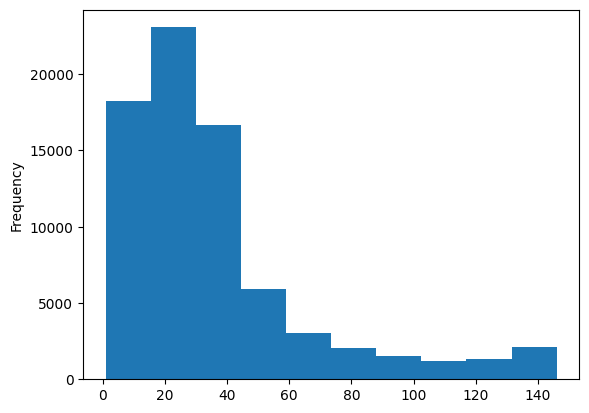

In [230]:
# len 시각화 (label == 0)
import matplotlib.pyplot as plt
df[df.label==0]['len'].plot(kind='hist')

<Axes: ylabel='Frequency'>

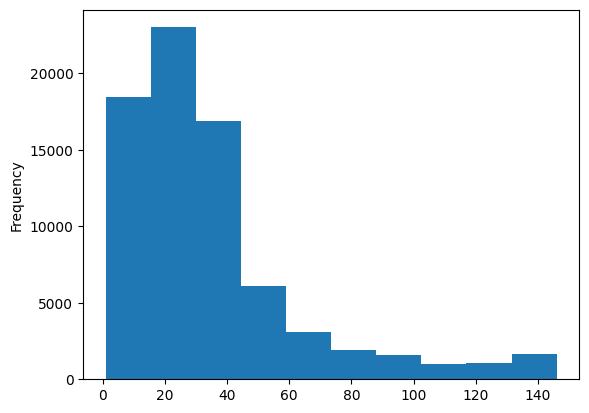

In [231]:
# len 시각화 (label == 1)
import matplotlib.pyplot as plt
df[df.label==1]['len'].plot(kind='hist')

In [232]:
# 데이터 샘플링 df[:1000]
df = df[:1000]
df.shape

(1000, 4)

In [233]:
# 토큰화
vect = CountVectorizer(tokenizer = tokenizer.morphs)
vectors = vect.fit_transform(df['document'])

#### **머신러닝**

In [234]:
# 머신러닝 -> 교차검증(f1)
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

model = RandomForestClassifier(random_state=2022)
cross_val_score(model, vectors, df['label'], scoring='f1', cv=5).mean()

0.6634352457852256

### **자연어 전처리**
##### **어휘 사전 구축**

In [235]:
# 토큰화(max_df) N개 보다 큰 단어 수 무시
vect = CountVectorizer(tokenizer = tokenizer.morphs, max_df = 10)
vectors = vect.fit_transform(df['document'])
model = RandomForestClassifier(random_state=2022)
cross_val_score(model, vectors, df['label'], scoring='accuracy', cv=5).mean()

0.643

In [236]:
# 토큰화(max_df) N개 보다 큰 단어 수 무시
vect = CountVectorizer(tokenizer = tokenizer.morphs, min_df = 2)
vectors = vect.fit_transform(df['document'])
model = RandomForestClassifier(random_state=2022)
cross_val_score(model, vectors, df['label'], scoring='accuracy', cv=5).mean()

0.689

##### **불용어(stopwords)**

In [237]:
# stop_words
text = "함께 탐험하며 성장하는 AI 학교 AIFFEL"
stop_words = ['하며', 'ai']
vect = CountVectorizer(stop_words = stop_words)
words = tokenizer.morphs(text)
vect.fit(words)
vect.vocabulary_

{'함께': 4, '탐험': 2, '성장하는': 1, '학교': 3, 'aiffel': 0}

##### **띄어쓰기**

In [238]:
# Spacing 설치
!pip install git+https://github.com/ssut/py-hanspell.git

  Cloning https://github.com/ssut/py-hanspell.git to /private/var/folders/91/xc9v37c52m793hfy2p1zlg5c0000gn/T/pip-req-build-3e8frt55
  Running command git clone --filter=blob:none --quiet https://github.com/ssut/py-hanspell.git /private/var/folders/91/xc9v37c52m793hfy2p1zlg5c0000gn/T/pip-req-build-3e8frt55
  Resolved https://github.com/ssut/py-hanspell.git to commit fdc6ca50c19f1c85971437a072d89d4e5ce024b8
  Preparing metadata (setup.py) ... done


In [239]:
!pip install git+https://github.com/haven-jeon/PyKoSpacing.git

  Cloning https://github.com/haven-jeon/PyKoSpacing.git to /private/var/folders/91/xc9v37c52m793hfy2p1zlg5c0000gn/T/pip-req-build-mns1id2u
  Running command git clone --filter=blob:none --quiet https://github.com/haven-jeon/PyKoSpacing.git /private/var/folders/91/xc9v37c52m793hfy2p1zlg5c0000gn/T/pip-req-build-mns1id2u
  Resolved https://github.com/haven-jeon/PyKoSpacing.git to commit 5bb0b3e8f62c1936a430745297821a9ecd78beb1
  Preparing metadata (setup.py) ... done


In [240]:
# 띄어쓰기
from pykospacing import Spacing
spacing = Spacing()
text = "함께탐험하며성장하는AI학교AIFFEL"
result = spacing(text)
print(result)

함께 탐험하며 성장하는 AI 학교 AIFFEL


##### **반복되는 글장정리**

In [241]:
# soynlp 설치
!pip install soynlp

In [242]:
# 댓글 데이터에 등장하는 반복되는 이모티콘의 정리
from soynlp.normalizer import *
emoticon_normalize('하하하하하하ㅠㅠㅠㅠㅠㅠㅠㅋㅋㅋㅋㅋㅋㅋㅋㅋ', num_repeats = 3)

'하하하ㅠㅠㅠㅋㅋㅋ'

##### **맞춤법 검사기**

In [249]:
!pip install git+https://github.com/jungin500/py-hanspell

  Cloning https://github.com/jungin500/py-hanspell to /private/var/folders/91/xc9v37c52m793hfy2p1zlg5c0000gn/T/pip-req-build-h09w9ynl
  Running command git clone --filter=blob:none --quiet https://github.com/jungin500/py-hanspell /private/var/folders/91/xc9v37c52m793hfy2p1zlg5c0000gn/T/pip-req-build-h09w9ynl
  Resolved https://github.com/jungin500/py-hanspell to commit 9cf4ce38a8d259b92dc8af3f35d7c2442e130180
  Preparing metadata (setup.py) ... done


In [258]:
# 맞춤법 검사
from hanspell import spell_checker
text = '사생활치매. 안핵갈려요. 뺑손이사고. 권투를 빈다. 설흔 즈음에. 문안한 스타일. 거북암이 들다. 마음이 절여온다. 골이따분한 성격. 노력이 숲으로 돌아가다. 일해라 절해라 하지 마세요.'
result = spell_checker.check(text)

In [259]:
# 수정된 문장
result.checked

'그는 긴 여정을 끝내 고 집으로 돌아왔다. 하지만 그곳에는 아무도 없었다. 만들어진'